In [171]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

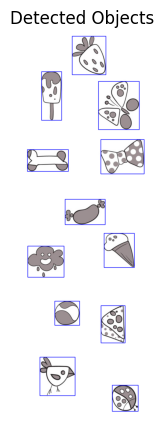

In [179]:
image = cv2.imread("image/finding_obj.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)


kernel = np.ones((10, 10), np.uint8)
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

template_list = []

image_with_boxes = image.copy()
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 50 and h > 50: 
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (255, 0, 0), 2)
        template = image[y:y+h, x:x+w] 
        template_list.append(template)

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Detected Objects")
plt.show()

In [173]:
def show_img(main_image_rgb):
    plt.figure(figsize=(10, 10))
    plt.imshow(main_image_rgb)
    plt.axis('off')
    plt.show()  

In [174]:
def template_matching(img, template, threshold=0.8):
    if len(template.shape) == 3:
        template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    w, h = template.shape[1], template.shape[0]
    scales = np.linspace(0.5, 1.5, num=15)
    results = []
    
    for scale in scales:
        # Thay đổi kích thước mẫu template
        resized_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
        rw, rh = resized_template.shape[1], resized_template.shape[0]  # Kích thước mới sau resize
        
        # Kiểm tra xem template có lớn hơn ảnh gốc không
        if rw > img.shape[1] or rh > img.shape[0]:
            continue
            
        # So khớp mẫu
        res = cv2.matchTemplate(img, resized_template, cv2.TM_CCOEFF_NORMED)
        loc = np.where(res >= threshold)
        
        # Lưu các vị trí tìm thấy
        for pt in zip(*loc[::-1]):  # Chú ý thứ tự x, y (cột, hàng)
            # Lấy tọa độ đúng
            top_left = pt
            bottom_right = (pt[0] + rw, pt[1] + rh)
            results.append((top_left, bottom_right, scale))
    
    return results

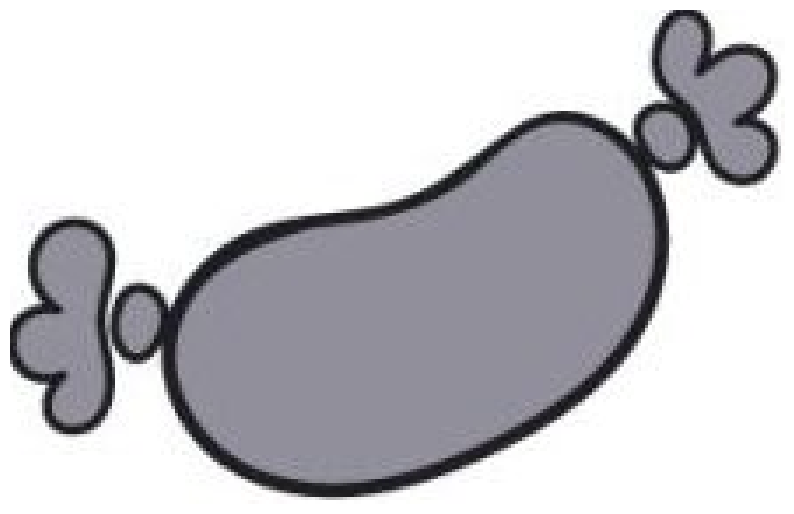

In [175]:
show_img(template_list[6])

In [176]:

def finding_obj(image, template_list):
    result_list = []
    for template in tqdm(template_list):
        thred = 0.9
        while True:
            result = template_matching(image, template, threshold=thred)
            if len(result) > 0:
                result_list.append([result, thred])
                break
            else: thred = thred - 0.1
    return result_list

image = cv2.imread("image/finding.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
all_result = finding_obj(image, template_list)
len(all_result)

100%|██████████| 12/12 [00:54<00:00,  4.58s/it]


12

In [177]:
def show_image_and_object(result, image, template_list):
    for i, (result, thred) in tqdm(enumerate(all_result)):
        new_img = image.copy()
        for top_left, bottom_right, scale in result:
            cv2.rectangle(new_img, top_left, bottom_right, (255, 0, 0), 5)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, ảnh thứ 1
        plt.imshow(new_img)
        plt.title(f"object with threshold={thred:.4f}")
        plt.axis("off")

        plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, ảnh thứ 2
        plt.imshow(template_list[i])
        plt.title(f"template with scale={scale:.4f}")
        plt.axis("off")

12it [00:00, 27.77it/s]


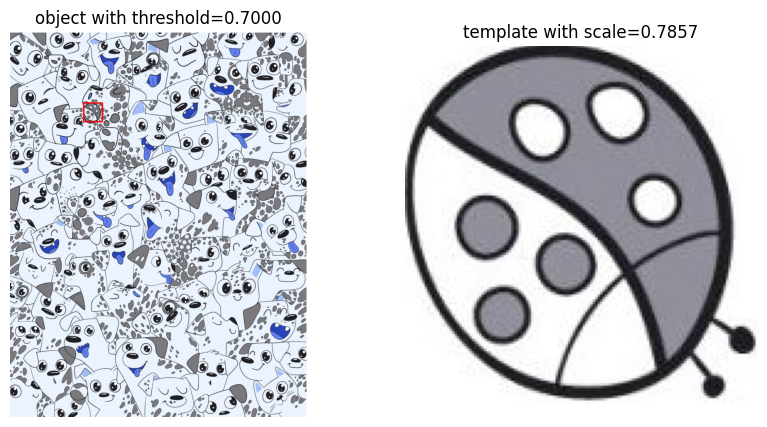

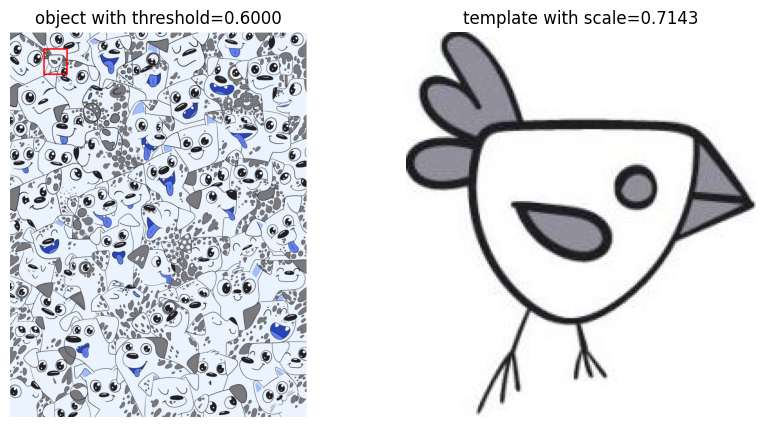

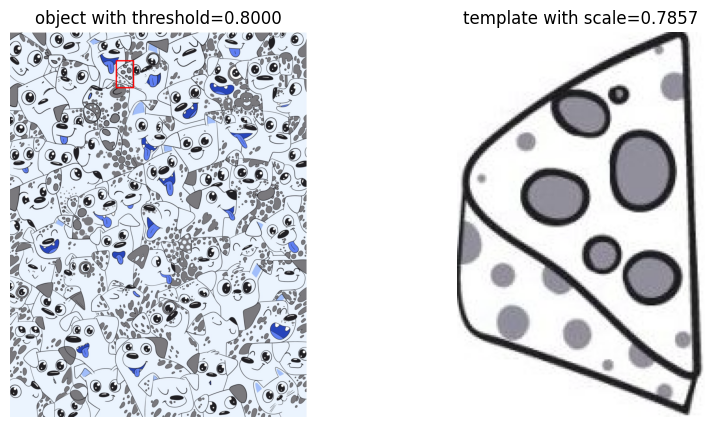

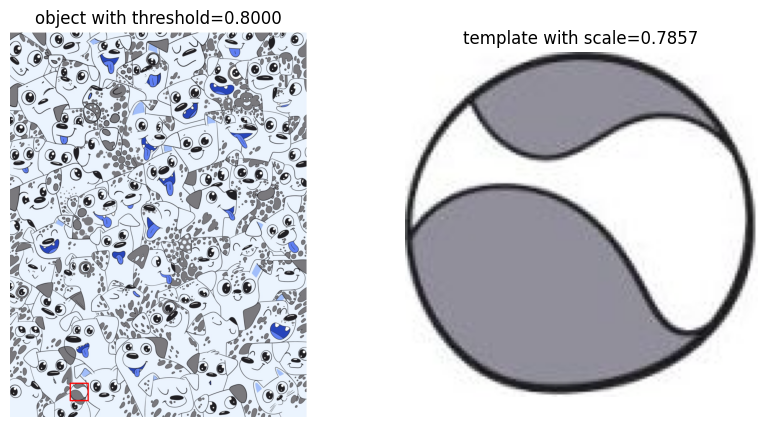

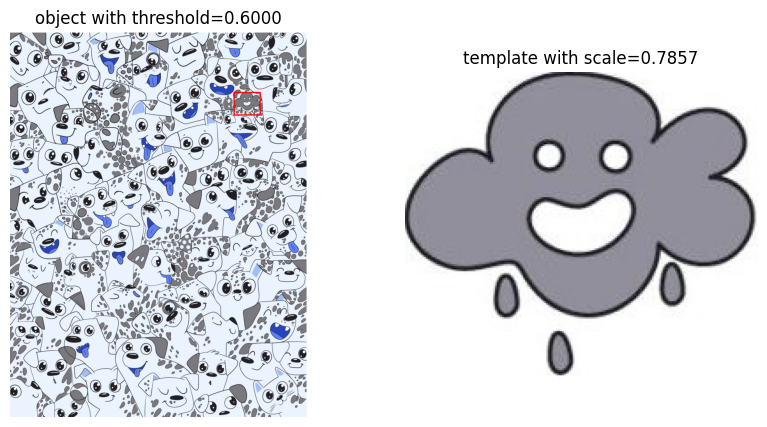

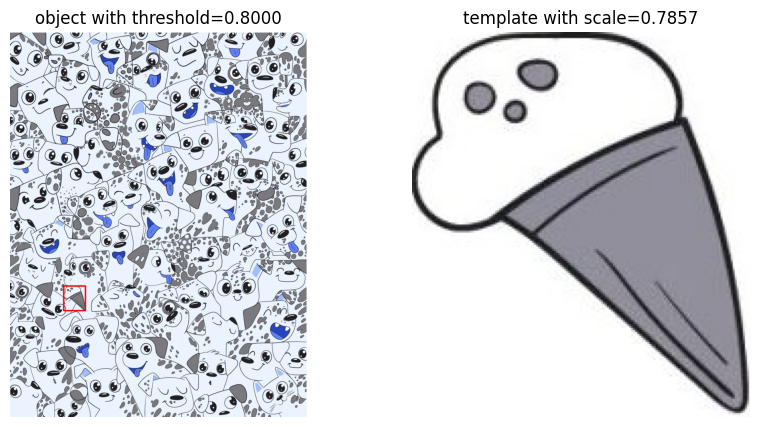

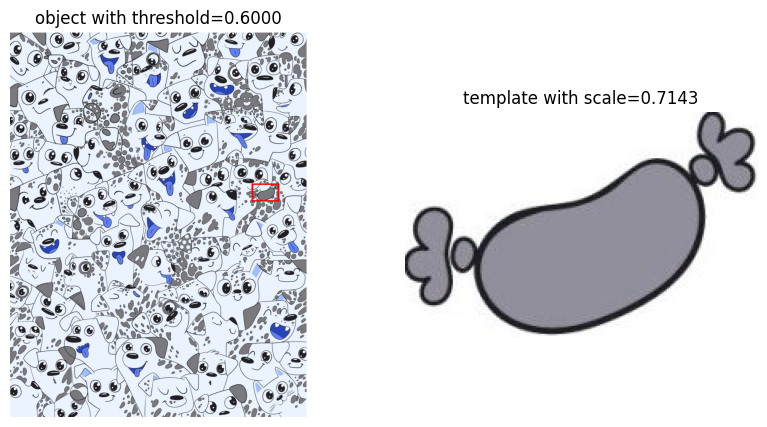

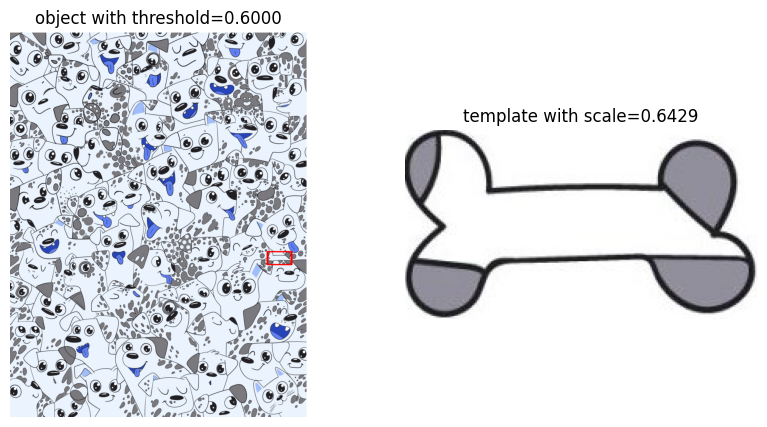

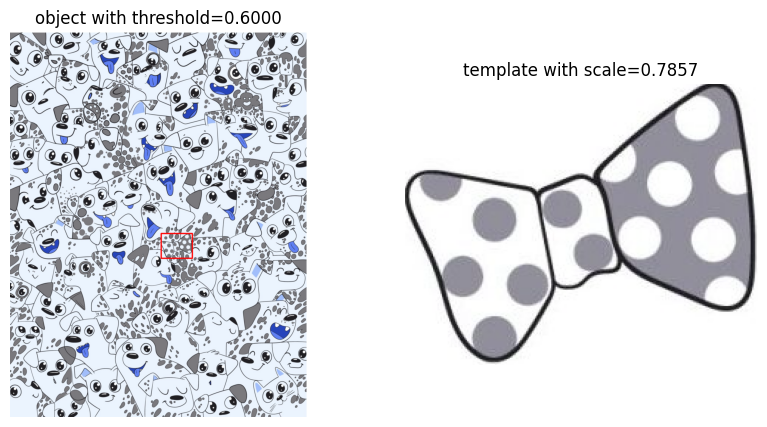

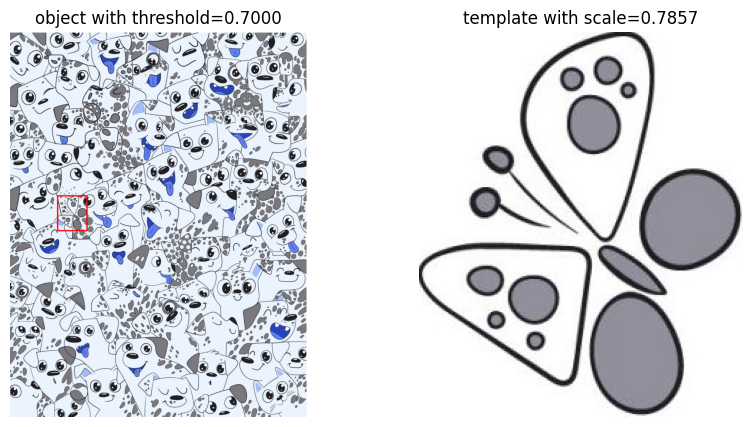

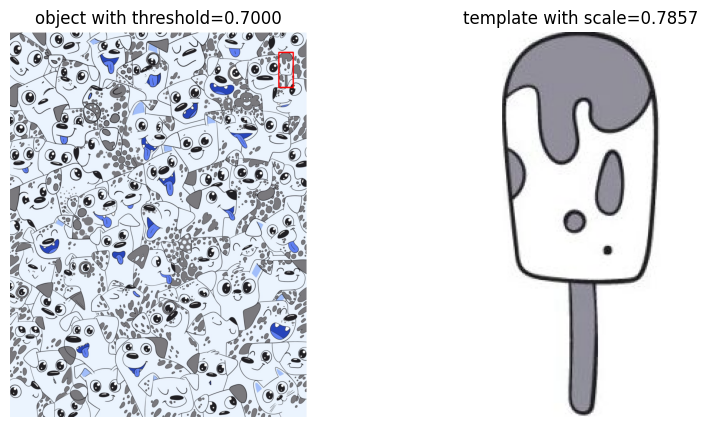

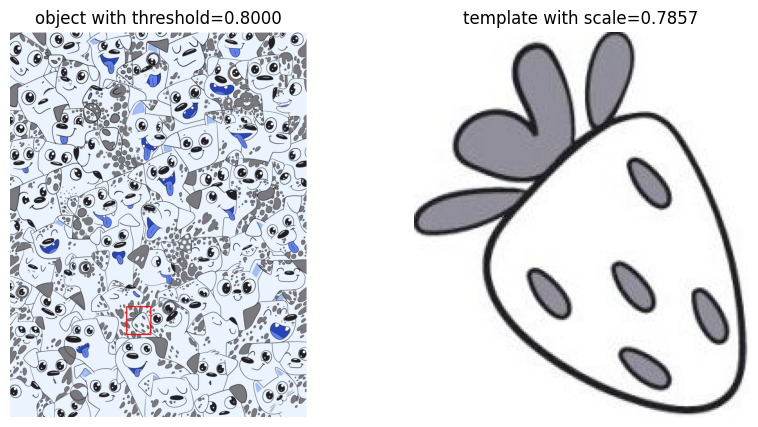

In [178]:
image = cv2.imread("image/finding.jpg")
show_image_and_object(all_result, image, template_list)